In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import io

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
energy_data = pd.read_csv("/content/drive/My Drive/energydata_complete.csv", sep=',')
                              
#energy_data = pd.read_csv("C:/Users/udita/Documents/workspace/group3/data/Appliances Energy/energydata_complete.csv", sep=',')
energy_data.head()

In [0]:
energy_data['date'] = pd.to_datetime(energy_data['date'])

In [0]:
energy_data['month'] = energy_data['date'].dt.month
energy_data['day'] = energy_data['date'].dt.day
energy_data['week'] = energy_data['date'].dt.week
energy_data['hour'] = energy_data['date'].dt.hour
energy_data['min'] = energy_data['date'].dt.minute

In [0]:
energy_data = energy_data.drop('date', axis = 1)

In [0]:
energy_data['month'] = energy_data['month'].astype('category')
energy_data['day']   = energy_data['day'].astype('category')
energy_data['week']  = energy_data['week'].astype('category') 
energy_data['hour']  = energy_data['hour'].astype('category') 
energy_data['min']   = energy_data['min'].astype('category')  

In [0]:
energy_data = pd.get_dummies(energy_data)
# Display the first 5 rows of the last 12 columns
energy_data.iloc[:,5:].head(5)

In [0]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(energy_data['Appliances'])
# Remove the labels from the features
# axis 1 refers to the columns
energy_data= energy_data.drop('Appliances', axis = 1)
# Saving feature names for later use
energydata_list = list(energy_data.columns)
# Convert to numpy array
energy_data = np.array(energy_data)

In [0]:
train_features, test_features, train_labels, test_labels = train_test_split(energy_data, labels, test_size = 0.25, random_state = 0)

In [11]:
print(len(train_features), "train +", len(test_features), "test")

14801 train + 4934 test


In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (14801, 113)
Training Labels Shape: (14801,)
Testing Features Shape: (4934, 113)
Testing Labels Shape: (4934,)


In [0]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 500,n_jobs=-1, random_state=42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [15]:
predictions = rf.predict(test_features) #predictions on test data
errors = abs(predictions - test_labels)
print('Mean Absolute Error on test data:', round(np.mean(errors), 2), 'Wh')
mape = 100 * (errors / test_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of test data:', round(accuracy, 2), '%.')

Mean Absolute Error on test data: 35.61 Wh
Accuracy of test data: 66.05 %.


In [0]:
from sklearn.metrics import r2_score
test_acc = r2_score(test_labels,predictions)

pred_train = rf.predict(train_features)
train_acc = r2_score(train_labels,pred_train)

In [52]:
print ("R2 score of train data" , train_acc)
print ("R2 score of test data", test_acc)

R2 score of train data 0.9358050420631328
R2 score of test data 0.47880031910028253


In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(train_labels, pred_train))
print("RMSE of train data" , rms) 
rmse = sqrt(mean_squared_error(test_labels, predictions))
print("RMSE of test data" , rmse) 

RMSE of train data 25.658236914738836
RMSE of test data 76.65312803173167


In [0]:
#calculate importances of features and drop suboptimal features
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance,3)) for feature, importance in zip(energydata_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Text(0,0.5,'Variable')

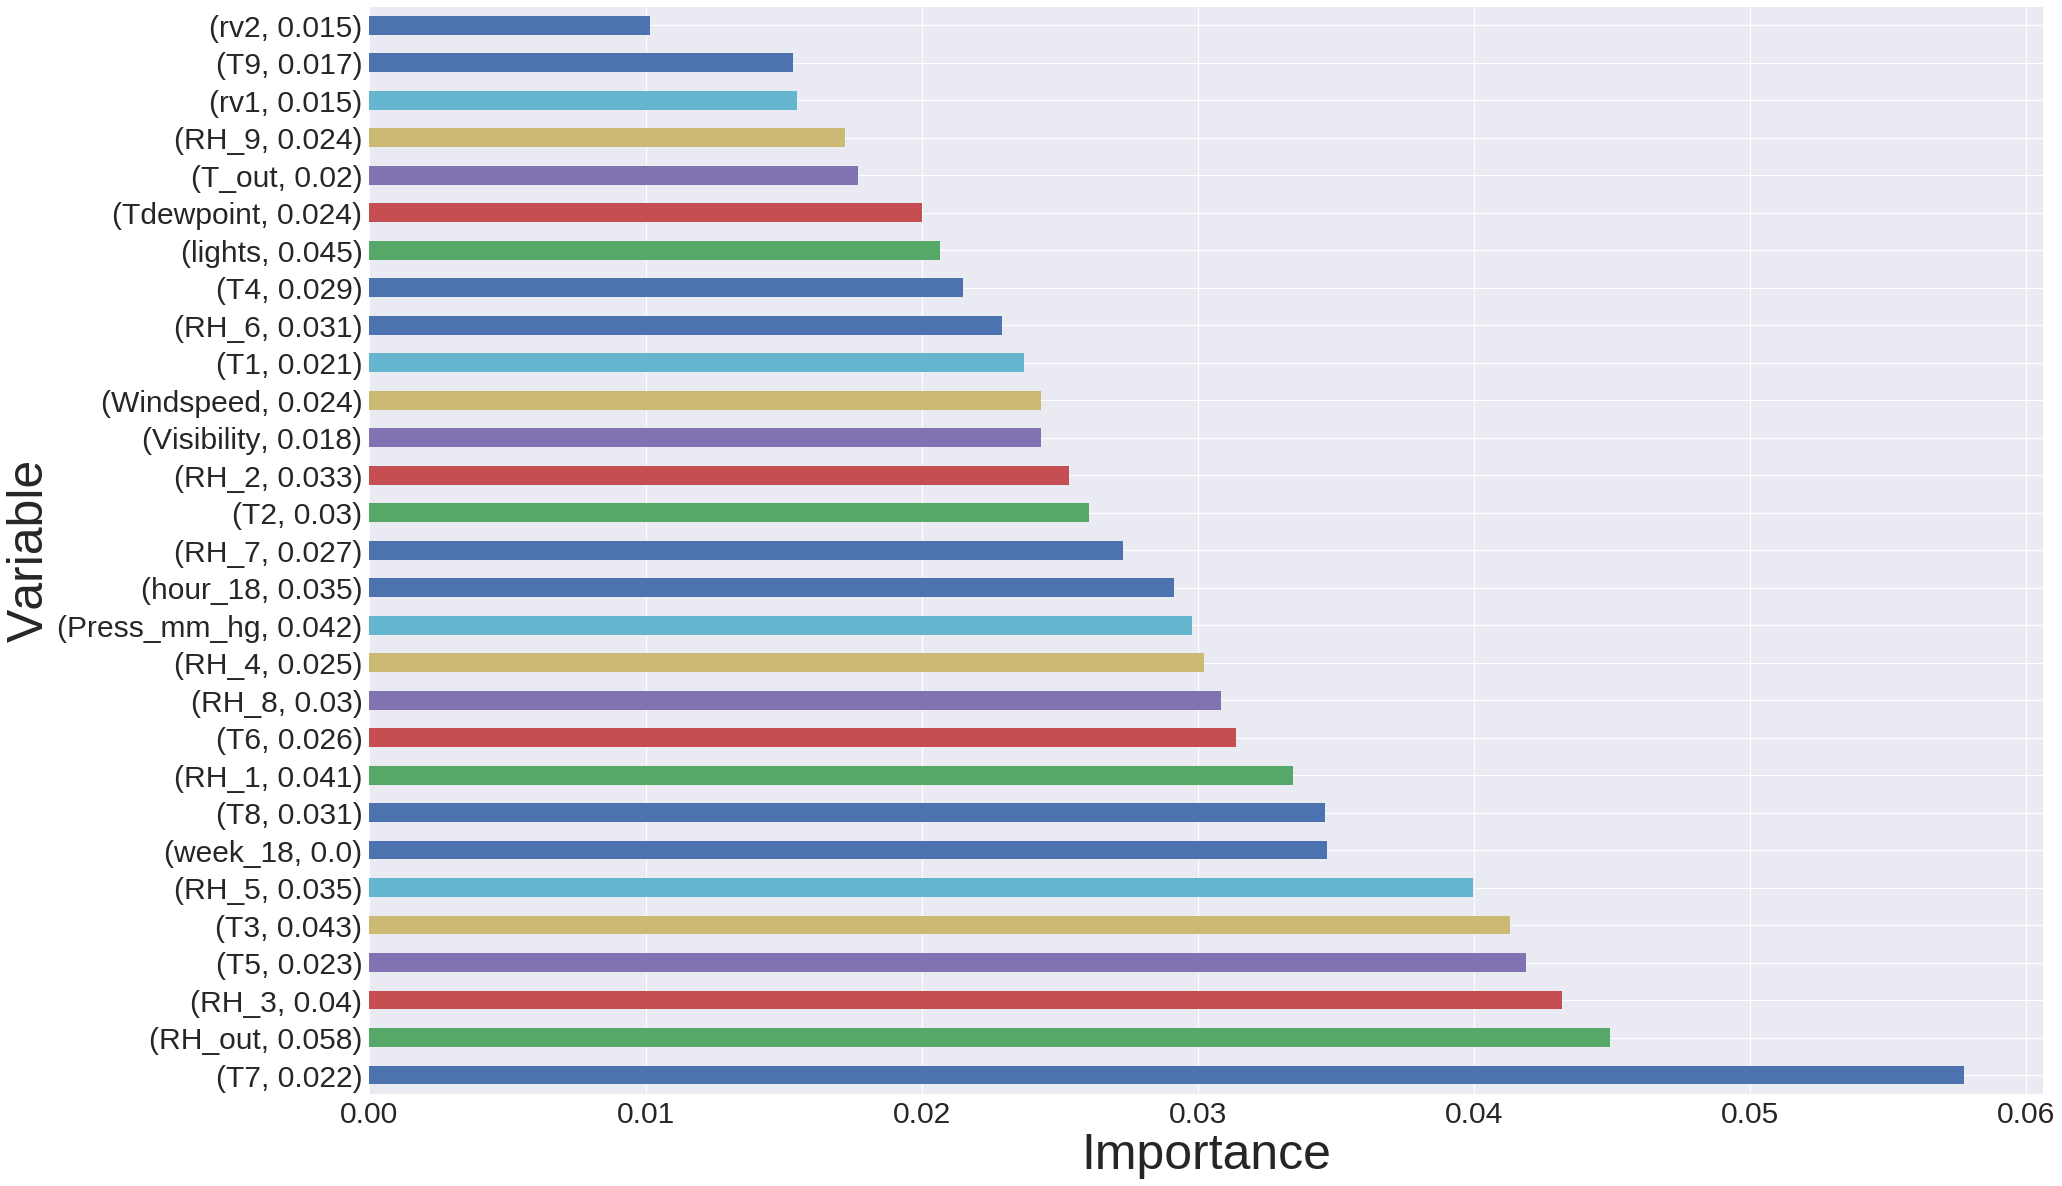

In [123]:
plt.figure(figsize=(30,20))
feat_importances = pd.Series(rf.feature_importances_, index= feature_importances)
feat_importances.nlargest(29).plot(kind='barh',fontsize=30)

plt.xlabel("Importance", fontsize=50)
plt.ylabel("Variable", fontsize=50)


In [0]:
# New random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators= 400,n_jobs=-1, random_state=42) #same parameters as above
# Extract the 24 most important features i.e. non zero importance 
important_indices = [energydata_list.index('lights'), energydata_list.index('RH_out'),energydata_list.index('T3'), energydata_list.index('RH_3'),energydata_list.index('RH_8'),
                    energydata_list.index('Press_mm_hg'),energydata_list.index('T2'),energydata_list.index('RH_2'),energydata_list.index('T4'),energydata_list.index('RH_4'),
                    energydata_list.index('T5'),energydata_list.index('RH_5'),energydata_list.index('RH_6'),energydata_list.index('RH_7'),energydata_list.index('T6'),
                    energydata_list.index('RH_4'),energydata_list.index('RH_9'),energydata_list.index('Windspeed'),energydata_list.index('Tdewpoint'),
                    energydata_list.index('T5'),energydata_list.index('T7'),energydata_list.index('T1'),energydata_list.index('T_out')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [39]:
print('Mean Absolute Error test data after pruning:', round(np.mean(errors), 2), 'Wh')
mape = 100 * (errors / test_labels)
#print('MAPE', mape)
accuracy = 100 - np.mean(mape)
#print('Prediction', predictions)
print('Accuracy of test data:', round(accuracy, 2), '%.')
from sklearn.metrics import r2_score
test_acc = r2_score(test_labels,predictions)

pred_train = rf_most_important.predict(train_important)
train_acc = r2_score(train_labels,pred_train)
print ("R2 score of train data after pruning", train_acc)
print ("R2 score of test data after pruning", test_acc)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(train_labels, pred_train))
print("RMSE of train data after pruning", rms) 
rmse = sqrt(mean_squared_error(test_labels, predictions))
print("RMSE of test data after pruning", rmse) 

Mean Absolute Error test data after pruning: 34.82 Wh
Accuracy of test data: 66.88 %.
R2 score of train data after pruning 0.9365706794890984
R2 score of test data after pruning 0.49598092949832207
RMSE of train data after pruning 25.50476821549717
RMSE of test data after pruning 75.37916044133615


Text(0,0.5,'RMSE (train)')

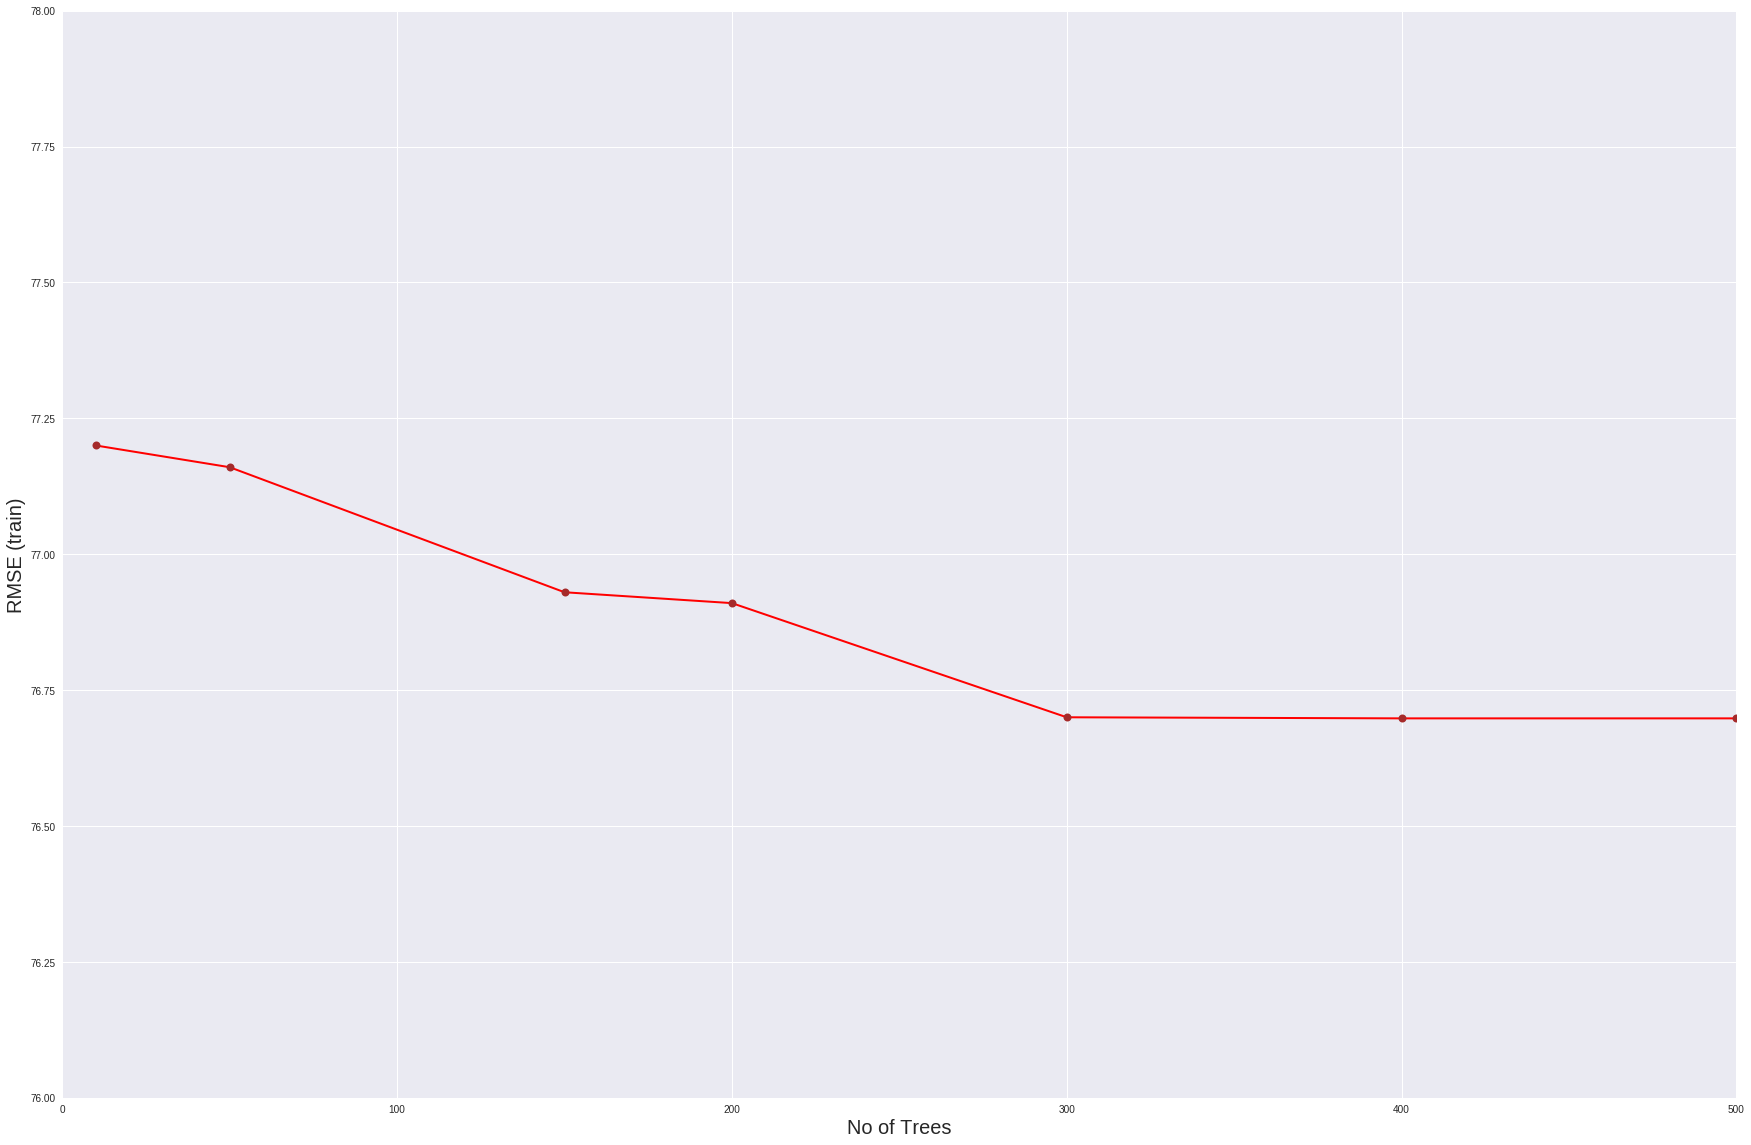

In [114]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.tools as tls
x = (10,50,150,200,300,400,500)
y = (77.20,77.16,76.93,76.91,76.70,76.698,76.698)

df=pd.DataFrame({'x': [10,50,150,200,300,400,500], 'RMSE': [77.20,77.16,76.93,76.91,76.70,76.698,76.698
]})
plt.figure(figsize=(30,20))
plt.plot( 'x', 'RMSE', data=df, marker='o', markerfacecolor='brown', markersize=8, color='red', linewidth=2)

plt.ylim(76, 78)
plt.xlim(0, 500)

plt.xlabel("No of Trees", fontsize=20)
plt.ylabel("RMSE (train)", fontsize=20)


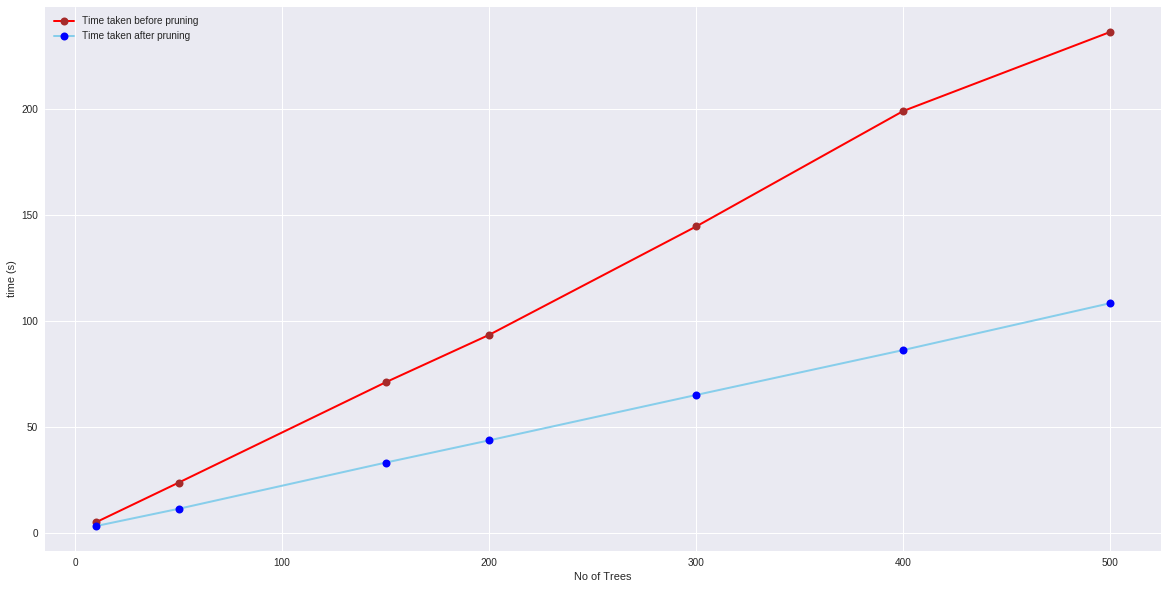

In [40]:
df=pd.DataFrame({'x': [10,50,150,200,300,400,500], 'Time taken before pruning': [4.961,
23.685,
71.01,
93.39,
144.509,
198.948,
236.239
], 'Time taken after pruning': [3.189,
11.342,
33.131,
43.627,
65.03,
86.21,
108.32

] })

plt.figure(figsize=(20,10))
# multiple line plot
plt.plot( 'x', 'Time taken before pruning', data=df, marker='o', markerfacecolor='brown', markersize=8, color='red', linewidth=2)
plt.plot( 'x', 'Time taken after pruning', data=df, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=2)
plt.xlabel("No of Trees")
plt.ylabel("time (s)")
plt.legend()


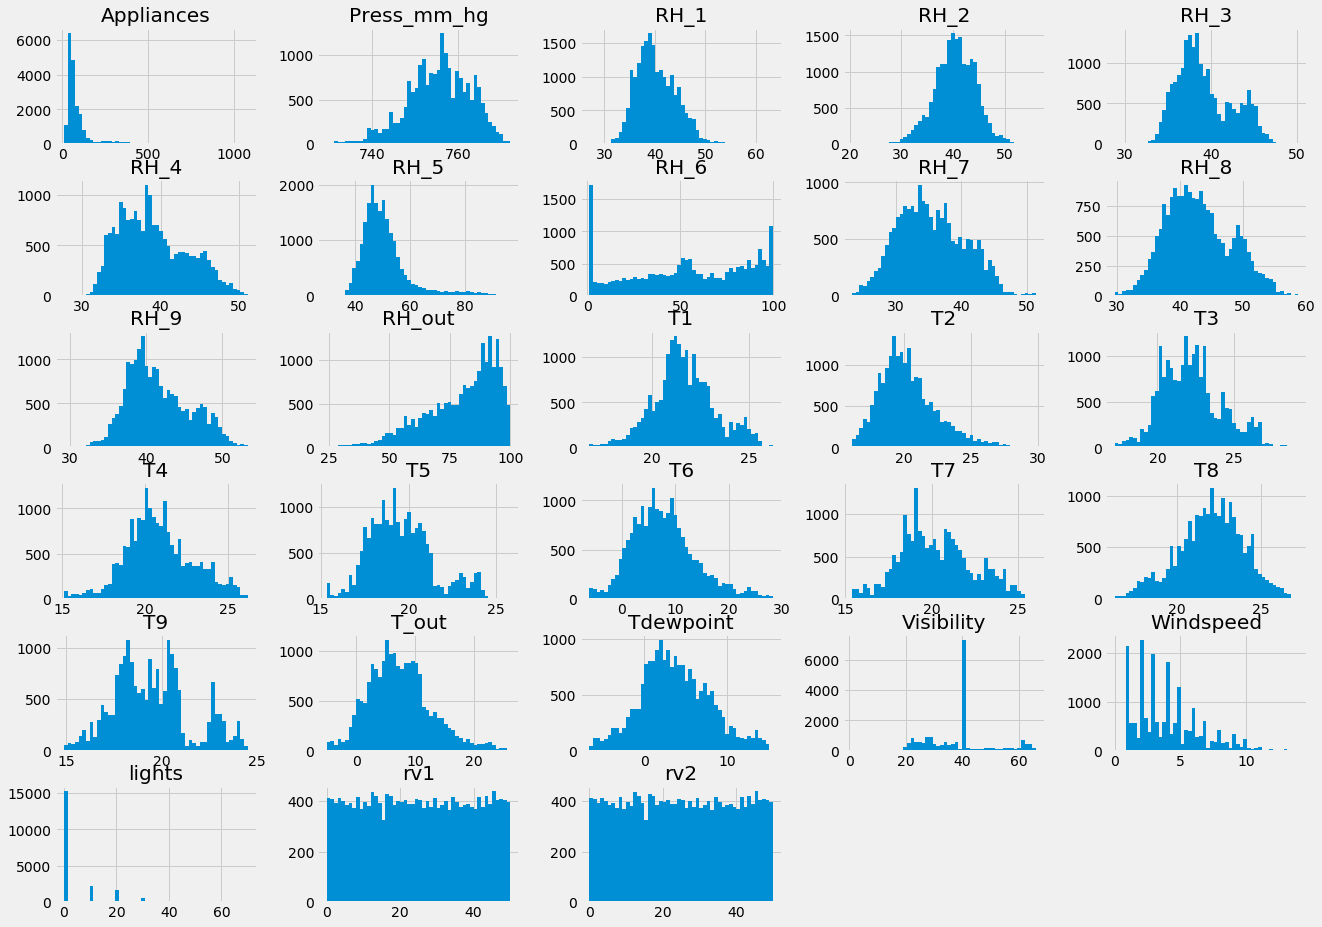

In [211]:
import matplotlib.pyplot as plt
energy_data.hist(bins=50, figsize=(20,15))
plt.show()